# Rainfall Prediction Model Using Basic Cloud Properties

## Preparing Data:

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

### 1. Reading Data:

In [2]:
train = pd.read_csv("data.csv")
train

,Location,Year,Date,CTT,CTP,COD,CER,WCER
0,Kolkata,2016,01-06-2016,213.829995,254.300004,20.849999,31.139999,14.720000
1,Kolkata,2016,02-06-2016,298.169993,893.200013,0.700000,22.500000,16.900000
2,Kolkata,2016,03-06-2016,298.029993,758.100011,-9999.000000,-9999.000000,16.780000
3,Kolkata,2016,04-06-2016,282.149994,750.800011,25.169999,35.429999,16.140000
4,Kolkata,2016,05-06-2016,283.499994,857.000013,12.360000,45.099999,15.640000
...,...,...,...,...,...,...,...,...
3655,Mumbai,2020,26-09-2020,240.059995,467.600007,2.110000,38.339999,24.839999
3656,Mumbai,2020,27-09-2020,286.409994,825.900012,11.290000,18.520000,14.970000
3657,Mumbai,2020,28-09-2020,285.829994,799.600012,7.920000,-9999.000000,19.410000
3658,Mumbai,2020,29-09-2020,290.379994,758.700011,7.790000,-9999.000000,10.820000


In [3]:
train.describe()

,Year,CTT,CTP,COD,CER,WCER
count,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,2018.000000,-364.653270,346.475197,-927.804284,-2439.735596,-1713.104391
std,1.414407,2431.071676,780.512206,2917.434922,4320.421121,3785.991117
min,2016.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,2017.000000,215.714995,209.650003,2.830000,7.292500,11.427500
50%,2018.000000,238.989995,325.300005,6.050000,25.929999,15.075000
75%,2019.000000,277.789994,557.375008,11.430000,32.949999,18.175000
max,2020.000000,312.649993,987.500015,120.979997,59.709999,29.669999


In [4]:
test = pd.read_csv("test.csv")
test

,Location,Year,Date,CTT,CTP,COD,CER,WCER
0,Kolkata,2021,01-06-2021,289.659994,441.000007,33.349999,41.259999,14.81
1,Kolkata,2021,02-06-2021,246.719994,351.800005,2.400000,35.189999,15.22
2,Kolkata,2021,03-06-2021,285.719994,635.300009,14.860000,38.089999,17.55
3,Kolkata,2021,04-06-2021,302.139993,728.600011,-9999.000000,-9999.000000,12.54
4,Kolkata,2021,05-06-2021,283.639994,259.900004,0.950000,51.149999,17.32
...,...,...,...,...,...,...,...,...
727,Mumbai,2021,26-09-2021,289.059994,681.100010,16.380000,-9999.000000,12.19
728,Mumbai,2021,27-09-2021,211.529995,161.200002,33.189999,20.840000,15.10
729,Mumbai,2021,28-09-2021,250.229994,293.800004,14.110000,24.239999,17.03
730,Mumbai,2021,29-09-2021,206.089995,161.900002,24.180000,32.279999,-9999.00


In [5]:
test.describe()

,Year,CTT,CTP,COD,CER,WCER
count,732.0,732.000000,732.000000,732.000000,732.000000,732.000000
mean,2021.0,-311.358776,384.296591,-727.286530,-2285.888990,-1570.505437
std,0.0,2330.933164,440.939764,2618.444159,4228.791842,3660.038802
min,2021.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,2021.0,216.062495,212.650003,3.002500,11.805000,12.127500
50%,2021.0,241.684995,336.150005,6.665000,26.144999,15.530000
75%,2021.0,276.187494,562.550008,12.897500,33.472499,18.582500
max,2021.0,311.119993,976.600015,92.989998,57.119999,28.229999


### 2. Dealing With Missing Values:

#### For Train Data:

In [6]:
train = train[(train['CTT']>-9999) & (train['CTP']>-9999) & (train['COD']>-9999) & (train['CER']>-9999) & (train['WCER']>-9999)]

In [7]:
train

,Location,Year,Date,CTT,CTP,COD,CER,WCER
0,Kolkata,2016,01-06-2016,213.829995,254.300004,20.849999,31.139999,14.720000
1,Kolkata,2016,02-06-2016,298.169993,893.200013,0.700000,22.500000,16.900000
3,Kolkata,2016,04-06-2016,282.149994,750.800011,25.169999,35.429999,16.140000
4,Kolkata,2016,05-06-2016,283.499994,857.000013,12.360000,45.099999,15.640000
5,Kolkata,2016,06-06-2016,284.779994,669.600010,23.989999,35.739999,15.060000
...,...,...,...,...,...,...,...,...
3651,Mumbai,2020,22-09-2020,222.349995,172.200003,44.229999,19.440000,15.190000
3652,Mumbai,2020,23-09-2020,221.209995,176.200003,16.940000,30.539999,20.649999
3654,Mumbai,2020,25-09-2020,229.299995,246.300004,15.070000,21.020000,18.330000
3655,Mumbai,2020,26-09-2020,240.059995,467.600007,2.110000,38.339999,24.839999


In [8]:
train.describe()

,Year,CTT,CTP,COD,CER,WCER
count,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000
mean,2017.986804,241.545261,352.371387,10.055068,28.403170,16.850771
std,1.430684,25.724901,178.935627,10.487669,8.917945,3.771670
min,2016.000000,195.909996,113.300002,0.540000,5.160000,5.130000
25%,2017.000000,219.719995,209.700003,3.540000,22.419999,14.110000
50%,2018.000000,236.169995,298.200004,6.770000,28.879999,16.530000
75%,2019.000000,261.539994,458.800007,12.370000,34.519999,19.320000
max,2020.000000,302.849993,927.800014,107.559998,59.709999,29.669999


#### For Test Data:

In [9]:
test = test[(test['CTT']>-9999) & (test['CTP']>-9999) & (test['COD']>-9999) & (test['CER']>-9999) & (test['WCER']>-9999)]

In [10]:
test.describe()

,Year,CTT,CTP,COD,CER,WCER
count,499.0,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2021.0,241.862981,356.064134,11.043266,28.927835,17.190220
std,0.0,24.727443,171.726933,11.714447,9.003436,3.559338
min,2021.0,195.979996,122.700002,0.660000,5.440000,9.610000
25%,2021.0,220.389995,213.350003,3.725000,22.189999,14.555000
50%,2021.0,238.939995,309.600005,7.100000,29.189999,17.030000
75%,2021.0,262.584994,449.900007,13.800000,35.114999,19.705000
max,2021.0,295.449993,891.400013,86.149998,57.119999,28.229999


## Graphs:

### Histograms:

#### For Terra Data:

In [11]:
kolkata_temp = train[train["Location"]=='Kolkata']
kolkata = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (kolkata_temp['Year'].keys()):
    if kolkata_temp['Year'][i] == 2016:
        kolkata['2016'].append(kolkata_temp['COD'][i])
    elif kolkata_temp['Year'][i] == 2017:
        kolkata['2017'].append(kolkata_temp['COD'][i])
    elif kolkata_temp['Year'][i] == 2018:
        kolkata['2018'].append(kolkata_temp['COD'][i])
    elif kolkata_temp['Year'][i] == 2019:
        kolkata['2019'].append(kolkata_temp['COD'][i])
    elif kolkata_temp['Year'][i] == 2020:
        kolkata['2020'].append(kolkata_temp['COD'][i])

        
def pad(dic):
    tmp = []
    for i in dic.keys():
        tmp.append(len(dic[i]))
    m = max(tmp)
    for i in dic.keys():
        j = len(dic[i])
        if j<m:
            while(j<m):
                dic[i].append(np.nan)
                j+=1
    return dic

pad(kolkata)
kolkata = pd.DataFrame(kolkata)
kolkata         

,2016,2017,2018,2019,2020
0,20.849999,3.670000,49.929999,1.830000,2.33
1,0.700000,0.750000,9.310000,1.370000,1.77
2,25.169999,2.290000,12.630000,11.850000,1.74
3,12.360000,0.980000,3.950000,95.809998,1.76
4,23.989999,3.830000,14.920000,8.040000,2.51
...,...,...,...,...,...
95,2.890000,3.540000,10.630000,NaN,NaN
96,14.660000,12.220000,5.370000,NaN,NaN
97,NaN,29.319999,1.980000,NaN,NaN
98,NaN,NaN,2.570000,NaN,NaN


Text(0.81, 0.7, 'mean: 11.56\nstd: 15.80')

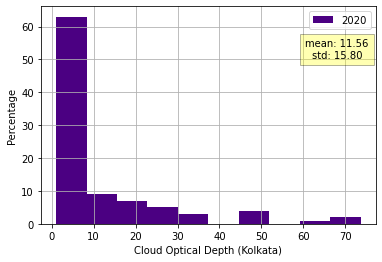

In [11]:
plt.xlabel('Cloud Optical Depth (Kolkata)')
plt.ylabel('Percentage')
#kolkata['2016'].hist()
#kolkata['2017'].hist()
#kolkata['2018'].hist()
#kolkata['2019'].hist()
kolkata['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(kolkata['2020'].mean(), kolkata['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [12]:
mumbai_temp = train[train["Location"]=='Mumbai']
mumbai = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (mumbai_temp['Year'].keys()):
    if mumbai_temp['Year'][i] == 2016:
        mumbai['2016'].append(mumbai_temp['COD'][i])
    elif mumbai_temp['Year'][i] == 2017:
        mumbai['2017'].append(mumbai_temp['COD'][i])
    elif mumbai_temp['Year'][i] == 2018:
        mumbai['2018'].append(mumbai_temp['COD'][i])
    elif mumbai_temp['Year'][i] == 2019:
        mumbai['2019'].append(mumbai_temp['COD'][i])
    elif mumbai_temp['Year'][i] == 2020:
        mumbai['2020'].append(mumbai_temp['COD'][i])

pad(mumbai)
mumbai = pd.DataFrame(mumbai)
mumbai 

,2016,2017,2018,2019,2020
0,1.77,5.95,2.040000,1.33,18.710000
1,3.68,3.20,6.510000,2.40,19.630000
2,4.17,6.47,8.030000,1.98,29.939999
3,5.63,8.78,27.269999,6.95,1.680000
4,1.83,19.42,3.220000,3.97,5.540000
...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,44.229999
87,NaN,NaN,NaN,NaN,16.940000
88,NaN,NaN,NaN,NaN,15.070000
89,NaN,NaN,NaN,NaN,2.110000


Text(0.81, 0.7, 'mean: 15.52\nstd: 12.65')

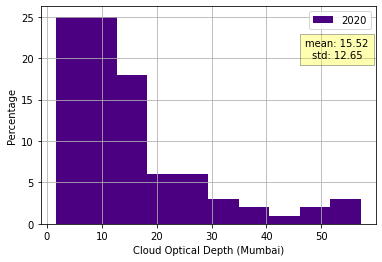

In [13]:
plt.xlabel('Cloud Optical Depth (Mumbai)')
plt.ylabel('Percentage')
#mumbai['2016'].hist()
#mumbai['2017'].hist()
#mumbai['2018'].hist()
#mumbai['2019'].hist()
mumbai['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(mumbai['2020'].mean(), mumbai['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [14]:
bangalore_temp = train[train["Location"]=='Bangalore']
bangalore = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (bangalore_temp['Year'].keys()):
    if bangalore_temp['Year'][i] == 2016:
        bangalore['2016'].append(bangalore_temp['COD'][i])
    elif bangalore_temp['Year'][i] == 2017:
        bangalore['2017'].append(bangalore_temp['COD'][i])
    elif bangalore_temp['Year'][i] == 2018:
        bangalore['2018'].append(bangalore_temp['COD'][i])
    elif bangalore_temp['Year'][i] == 2019:
        bangalore['2019'].append(bangalore_temp['COD'][i])
    elif bangalore_temp['Year'][i] == 2020:
        bangalore['2020'].append(bangalore_temp['COD'][i])

pad(bangalore)
bangalore = pd.DataFrame(bangalore)
bangalore 

,2016,2017,2018,2019,2020
0,6.420000,3.73,4.13,2.74,2.09
1,2.250000,4.81,8.40,1.00,3.58
2,3.340000,2.68,3.01,2.23,8.06
3,3.770000,7.43,3.53,1.35,4.11
4,3.070000,9.57,8.21,5.77,2.18
...,...,...,...,...,...
88,27.809999,NaN,NaN,2.67,NaN
89,20.980000,NaN,NaN,6.58,NaN
90,4.560000,NaN,NaN,3.32,NaN
91,9.430000,NaN,NaN,3.55,NaN


Text(0.81, 0.7, 'mean: 6.97\nstd: 4.25')

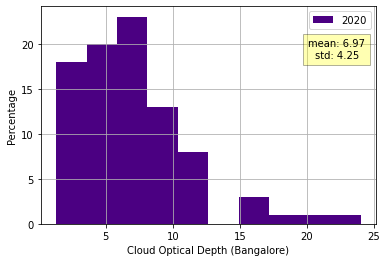

In [15]:
plt.xlabel('Cloud Optical Depth (Bangalore)')
plt.ylabel('Percentage')
#bangalore['2016'].hist()
#bangalore['2017'].hist()
#bangalore['2018'].hist()
#bangalore['2019'].hist()
bangalore['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(bangalore['2020'].mean(), bangalore['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [16]:
delhi_temp = train[train["Location"]=='Delhi']
delhi = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (delhi_temp['Year'].keys()):
    if delhi_temp['Year'][i] == 2016:
        delhi['2016'].append(delhi_temp['COD'][i])
    elif delhi_temp['Year'][i] == 2017:
        delhi['2017'].append(delhi_temp['COD'][i])
    elif delhi_temp['Year'][i] == 2018:
        delhi['2018'].append(delhi_temp['COD'][i])
    elif delhi_temp['Year'][i] == 2019:
        delhi['2019'].append(delhi_temp['COD'][i])
    elif delhi_temp['Year'][i] == 2020:
        delhi['2020'].append(delhi_temp['COD'][i])

pad(delhi)
delhi = pd.DataFrame(delhi)
delhi

,2016,2017,2018,2019,2020
0,18.80,6.310000,6.730000,9.670000,9.190000
1,7.02,1.280000,11.190000,36.989999,3.060000
2,3.23,49.239999,7.120000,41.999999,27.399999
3,2.39,28.769999,10.030000,5.400000,2.340000
4,9.41,4.080000,7.820000,2.750000,42.009999
...,...,...,...,...,...
60,18.20,2.920000,28.669999,5.550000,5.580000
61,7.62,45.379999,NaN,28.179999,3.380000
62,0.92,29.979999,NaN,12.010000,1.190000
63,1.91,NaN,NaN,NaN,3.580000


Text(0.81, 0.7, 'mean: 9.38\nstd: 8.78')

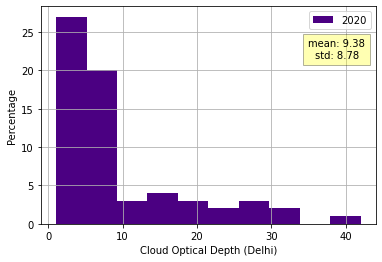

In [17]:
plt.xlabel('Cloud Optical Depth (Delhi)')
plt.ylabel('Percentage')
#delhi['2016'].hist()
#delhi['2017'].hist()
#delhi['2018'].hist()
#delhi['2019'].hist()
delhi['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(delhi['2020'].mean(), delhi['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [18]:
hyderabad_temp = train[train["Location"]=='Hyderabad']
hyderabad = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (hyderabad_temp['Year'].keys()):
    if hyderabad_temp['Year'][i] == 2016:
        hyderabad['2016'].append(hyderabad_temp['COD'][i])
    elif hyderabad_temp['Year'][i] == 2017:
        hyderabad['2017'].append(hyderabad_temp['COD'][i])
    elif hyderabad_temp['Year'][i] == 2018:
        hyderabad['2018'].append(hyderabad_temp['COD'][i])
    elif hyderabad_temp['Year'][i] == 2019:
        hyderabad['2019'].append(hyderabad_temp['COD'][i])
    elif hyderabad_temp['Year'][i] == 2020:
        hyderabad['2020'].append(hyderabad_temp['COD'][i])

pad(hyderabad)
hyderabad = pd.DataFrame(hyderabad)
hyderabad

,2016,2017,2018,2019,2020
0,12.760000,1.23,2.25,1.77,4.07
1,7.490000,2.58,0.98,2.87,4.18
2,14.490000,7.54,1.90,8.51,3.26
3,19.950000,9.84,5.46,1.13,4.36
4,27.939999,1.64,6.15,2.03,1.82
...,...,...,...,...,...
81,8.480000,4.94,NaN,NaN,10.61
82,8.770000,2.66,NaN,NaN,4.08
83,2.400000,5.96,NaN,NaN,10.61
84,12.920000,NaN,NaN,NaN,6.89


Text(0.81, 0.7, 'mean: 8.76\nstd: 8.16')

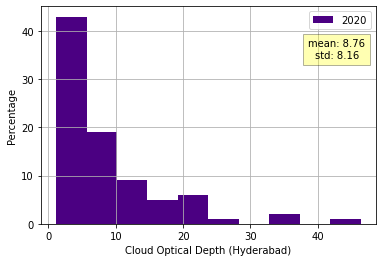

In [19]:
plt.xlabel('Cloud Optical Depth (Hyderabad)')
plt.ylabel('Percentage')
#hyderabad['2016'].hist()
#hyderabad['2017'].hist()
#hyderabad['2018'].hist()
#hyderabad['2019'].hist()
hyderabad['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(hyderabad['2020'].mean(), hyderabad['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [20]:
chennai_temp = train[train["Location"]=='Chennai']
chennai = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (chennai_temp['Year'].keys()):
    if chennai_temp['Year'][i] == 2016:
        chennai['2016'].append(chennai_temp['COD'][i])
    elif chennai_temp['Year'][i] == 2017:
        chennai['2017'].append(chennai_temp['COD'][i])
    elif chennai_temp['Year'][i] == 2018:
        chennai['2018'].append(chennai_temp['COD'][i])
    elif chennai_temp['Year'][i] == 2019:
        chennai['2019'].append(chennai_temp['COD'][i])
    elif chennai_temp['Year'][i] == 2020:
        chennai['2020'].append(chennai_temp['COD'][i])

pad(chennai)
chennai = pd.DataFrame(chennai)
chennai

,2016,2017,2018,2019,2020
0,1.25,0.86,2.42,2.55,1.23
1,5.62,1.41,2.76,2.20,1.41
2,3.05,12.23,3.55,0.77,0.54
3,2.56,6.14,4.30,1.78,1.03
4,11.11,12.34,1.21,0.86,1.88
...,...,...,...,...,...
82,3.05,NaN,NaN,NaN,NaN
83,4.21,NaN,NaN,NaN,NaN
84,7.14,NaN,NaN,NaN,NaN
85,14.04,NaN,NaN,NaN,NaN


Text(0.81, 0.7, 'mean: 6.68\nstd: 9.69')

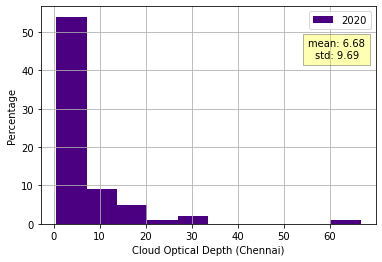

In [21]:
plt.xlabel('Cloud Optical Depth (Chennai)')
plt.ylabel('Percentage')
#chennai['2016'].hist(label='first')
#chennai['2017'].hist(label='firs')
#chennai['2018'].hist(label='fir')
#chennai['2019'].hist(label='fi')
chennai['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(chennai['2020'].mean(), chennai['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

#### For Aqua Data:

In [97]:
db = pd.read_csv("data_aqua.csv")
db

,Location,Date,Year,COD
0,Kolkata,01-06-2016,2016,2.41
1,Kolkata,02-06-2016,2016,-9999.00
2,Kolkata,03-06-2016,2016,24.20
3,Kolkata,04-06-2016,2016,20.12
4,Kolkata,05-06-2016,2016,15.59
...,...,...,...,...
3343,Bangalore,28-08-2021,2021,8.68
3344,Bangalore,29-08-2021,2021,7.33
3345,Bangalore,30-08-2021,2021,6.95
3346,Bangalore,31-08-2021,2021,3.85


In [98]:
db = db[(db['COD']>-9999)]
db

,Location,Date,Year,COD
0,Kolkata,01-06-2016,2016,2.410000
2,Kolkata,03-06-2016,2016,24.200000
3,Kolkata,04-06-2016,2016,20.120000
4,Kolkata,05-06-2016,2016,15.590000
5,Kolkata,06-06-2016,2016,54.159999
...,...,...,...,...
3343,Bangalore,28-08-2021,2021,8.680000
3344,Bangalore,29-08-2021,2021,7.330000
3345,Bangalore,30-08-2021,2021,6.950000
3346,Bangalore,31-08-2021,2021,3.850000


In [99]:
kolkata_temp = db[db["Location"]=='Kolkata']
kolkata = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (kolkata_temp['Year'].keys()):
    if kolkata_temp['Year'][i] == 2016:
        kolkata['2016'].append(kolkata_temp['COD'][i])
    elif kolkata_temp['Year'][i] == 2017:
        kolkata['2017'].append(kolkata_temp['COD'][i])
    elif kolkata_temp['Year'][i] == 2018:
        kolkata['2018'].append(kolkata_temp['COD'][i])
    elif kolkata_temp['Year'][i] == 2019:
        kolkata['2019'].append(kolkata_temp['COD'][i])
    elif kolkata_temp['Year'][i] == 2020:
        kolkata['2020'].append(kolkata_temp['COD'][i])

        
def pad(dic):
    tmp = []
    for i in dic.keys():
        tmp.append(len(dic[i]))
    m = max(tmp)
    for i in dic.keys():
        j = len(dic[i])
        if j<m:
            while(j<m):
                dic[i].append(np.nan)
                j+=1
    return dic

pad(kolkata)
kolkata = pd.DataFrame(kolkata)
kolkata

,2016,2017,2018,2019,2020
0,2.410000,2.52,26.139999,1.970000,2.650000
1,24.200000,4.32,4.760000,37.579999,0.740000
2,20.120000,0.68,25.209999,2.030000,1.840000
3,15.590000,6.02,11.890000,54.139999,10.240000
4,54.159999,2.00,10.900000,5.090000,27.059999
...,...,...,...,...,...
82,5.950000,13.03,23.049999,NaN,NaN
83,19.150000,19.39,24.380000,NaN,NaN
84,54.279999,10.74,11.770000,NaN,NaN
85,8.540000,16.74,NaN,NaN,NaN


Text(0.81, 0.7, 'mean: 17.56\nstd: 19.38')

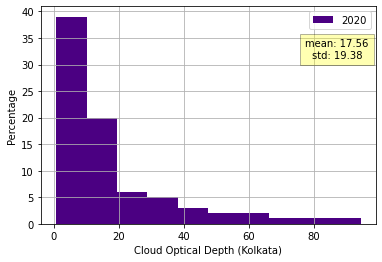

In [100]:
plt.xlabel('Cloud Optical Depth (Kolkata)')
plt.ylabel('Percentage')
#kolkata['2016'].hist()
#kolkata['2017'].hist()
#kolkata['2018'].hist()
#kolkata['2019'].hist()
kolkata['2020'].hist()
kolkata['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(kolkata['2020'].mean(), kolkata['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [101]:
mumbai_temp = db[db["Location"]=='Mumbai']
mumbai = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (mumbai_temp['Year'].keys()):
    if mumbai_temp['Year'][i] == 2016:
        mumbai['2016'].append(mumbai_temp['COD'][i])
    elif mumbai_temp['Year'][i] == 2017:
        mumbai['2017'].append(mumbai_temp['COD'][i])
    elif mumbai_temp['Year'][i] == 2018:
        mumbai['2018'].append(mumbai_temp['COD'][i])
    elif mumbai_temp['Year'][i] == 2019:
        mumbai['2019'].append(mumbai_temp['COD'][i])
    elif mumbai_temp['Year'][i] == 2020:
        mumbai['2020'].append(mumbai_temp['COD'][i])

pad(mumbai)
mumbai = pd.DataFrame(mumbai)
mumbai

,2016,2017,2018,2019,2020
0,1.17,1.49,0.890000,1.04,9.250000
1,1.62,0.37,2.910000,1.75,25.689999
2,2.48,0.67,5.680000,1.80,15.080000
3,1.28,1.41,1.910000,14.26,1.480000
4,1.03,9.42,25.199999,2.27,2.680000
...,...,...,...,...,...
71,0.75,7.59,1.640000,NaN,4.690000
72,9.62,NaN,3.570000,NaN,24.009999
73,3.39,NaN,3.790000,NaN,4.350000
74,NaN,NaN,NaN,NaN,43.349999


Text(0.81, 0.7, 'mean: 16.43\nstd: 17.69')

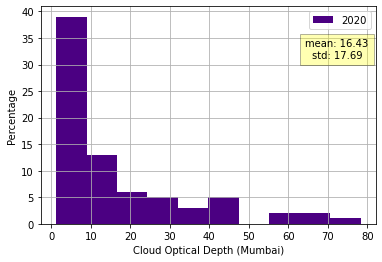

In [102]:
plt.xlabel('Cloud Optical Depth (Mumbai)')
plt.ylabel('Percentage')
#mumbai['2016'].hist()
#mumbai['2017'].hist()
#mumbai['2018'].hist()
#mumbai['2019'].hist()
mumbai['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(mumbai['2020'].mean(), mumbai['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [103]:
bangalore_temp = db[db["Location"]=='Bangalore']
bangalore = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (bangalore_temp['Year'].keys()):
    if bangalore_temp['Year'][i] == 2016:
        bangalore['2016'].append(bangalore_temp['COD'][i])
    elif bangalore_temp['Year'][i] == 2017:
        bangalore['2017'].append(bangalore_temp['COD'][i])
    elif bangalore_temp['Year'][i] == 2018:
        bangalore['2018'].append(bangalore_temp['COD'][i])
    elif bangalore_temp['Year'][i] == 2019:
        bangalore['2019'].append(bangalore_temp['COD'][i])
    elif bangalore_temp['Year'][i] == 2020:
        bangalore['2020'].append(bangalore_temp['COD'][i])

pad(bangalore)
bangalore = pd.DataFrame(bangalore)
bangalore 

,2016,2017,2018,2019,2020
0,1.18,3.48,2.83,1.79,3.54
1,4.09,3.92,6.16,2.91,4.01
2,2.72,5.02,6.87,1.93,5.19
3,1.32,3.09,3.89,1.07,11.12
4,2.36,13.91,4.60,4.86,4.94
...,...,...,...,...,...
78,6.61,10.02,NaN,NaN,NaN
79,8.95,4.13,NaN,NaN,NaN
80,10.38,6.99,NaN,NaN,NaN
81,10.05,NaN,NaN,NaN,NaN


Text(0.81, 0.7, 'mean: 6.73\nstd: 5.83')

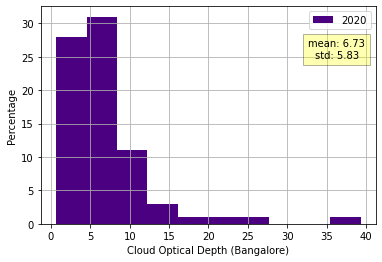

In [107]:
plt.xlabel('Cloud Optical Depth (Bangalore)')
plt.ylabel('Percentage')
#bangalore['2016'].hist()
#bangalore['2017'].hist()
#bangalore['2018'].hist()
#bangalore['2019'].hist()
bangalore['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(bangalore['2020'].mean(), bangalore['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [108]:
delhi_temp = db[db["Location"]=='Delhi']
delhi = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (delhi_temp['Year'].keys()):
    if delhi_temp['Year'][i] == 2016:
        delhi['2016'].append(delhi_temp['COD'][i])
    elif delhi_temp['Year'][i] == 2017:
        delhi['2017'].append(delhi_temp['COD'][i])
    elif delhi_temp['Year'][i] == 2018:
        delhi['2018'].append(delhi_temp['COD'][i])
    elif delhi_temp['Year'][i] == 2019:
        delhi['2019'].append(delhi_temp['COD'][i])
    elif delhi_temp['Year'][i] == 2020:
        delhi['2020'].append(delhi_temp['COD'][i])

pad(delhi)
delhi = pd.DataFrame(delhi)
delhi

,2016,2017,2018,2019,2020
0,0.980000,8.41,7.02,2.040000,2.800000
1,2.080000,1.01,4.23,5.840000,14.180000
2,2.280000,6.23,13.29,1.890000,1.550000
3,1.160000,0.21,5.80,18.880000,38.639999
4,4.290000,22.97,20.48,149.999997,14.170000
...,...,...,...,...,...
72,12.880000,NaN,NaN,NaN,NaN
73,21.459999,NaN,NaN,NaN,NaN
74,47.579999,NaN,NaN,NaN,NaN
75,23.829999,NaN,NaN,NaN,NaN


Text(0.81, 0.7, 'mean: 9.72\nstd: 10.46')

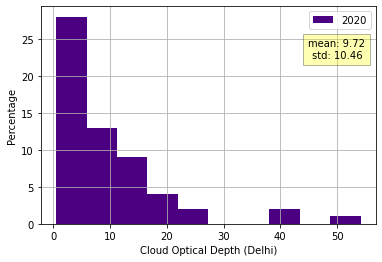

In [109]:
plt.xlabel('Cloud Optical Depth (Delhi)')
plt.ylabel('Percentage')
#delhi['2016'].hist()
#delhi['2017'].hist()
#delhi['2018'].hist()
#delhi['2019'].hist()
delhi['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(delhi['2020'].mean(), delhi['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [110]:
hyderabad_temp = db[db["Location"]=='Hyderabad']
hyderabad = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (hyderabad_temp['Year'].keys()):
    if hyderabad_temp['Year'][i] == 2016:
        hyderabad['2016'].append(hyderabad_temp['COD'][i])
    elif hyderabad_temp['Year'][i] == 2017:
        hyderabad['2017'].append(hyderabad_temp['COD'][i])
    elif hyderabad_temp['Year'][i] == 2018:
        hyderabad['2018'].append(hyderabad_temp['COD'][i])
    elif hyderabad_temp['Year'][i] == 2019:
        hyderabad['2019'].append(hyderabad_temp['COD'][i])
    elif hyderabad_temp['Year'][i] == 2020:
        hyderabad['2020'].append(hyderabad_temp['COD'][i])

pad(hyderabad)
hyderabad = pd.DataFrame(hyderabad)
hyderabad

,2016,2017,2018,2019,2020
0,1.04,17.51,3.46,4.29,1.83
1,6.94,3.52,2.47,21.32,1.67
2,1.10,4.09,1.88,0.77,4.28
3,2.67,0.97,3.26,1.67,1.61
4,5.89,4.80,5.90,4.62,2.79
...,...,...,...,...,...
77,6.25,16.79,NaN,NaN,NaN
78,NaN,5.20,NaN,NaN,NaN
79,NaN,3.29,NaN,NaN,NaN
80,NaN,2.39,NaN,NaN,NaN


Text(0.81, 0.7, 'mean: 9.37\nstd: 8.64')

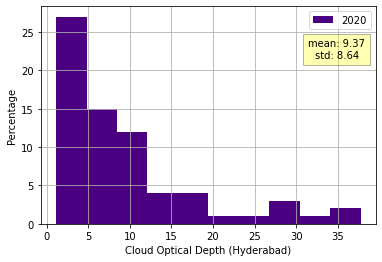

In [112]:
plt.xlabel('Cloud Optical Depth (Hyderabad)')
plt.ylabel('Percentage')
#hyderabad['2016'].hist()
#hyderabad['2017'].hist()
#hyderabad['2018'].hist()
#hyderabad['2019'].hist()
hyderabad['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(hyderabad['2020'].mean(), hyderabad['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

In [113]:
chennai_temp = db[db["Location"]=='Chennai']
chennai = {
    '2016': [],
    '2017': [],
    '2018': [],
    '2019': [],
    '2020': [],
}
for i in (chennai_temp['Year'].keys()):
    if chennai_temp['Year'][i] == 2016:
        chennai['2016'].append(chennai_temp['COD'][i])
    elif chennai_temp['Year'][i] == 2017:
        chennai['2017'].append(chennai_temp['COD'][i])
    elif chennai_temp['Year'][i] == 2018:
        chennai['2018'].append(chennai_temp['COD'][i])
    elif chennai_temp['Year'][i] == 2019:
        chennai['2019'].append(chennai_temp['COD'][i])
    elif chennai_temp['Year'][i] == 2020:
        chennai['2020'].append(chennai_temp['COD'][i])

pad(chennai)
chennai = pd.DataFrame(chennai)
chennai

,2016,2017,2018,2019,2020
0,0.830000,0.46,1.10,1.22,1.71
1,2.540000,0.99,1.01,1.24,2.19
2,0.730000,3.03,1.30,0.70,0.56
3,6.850000,0.50,2.23,1.08,0.56
4,2.860000,4.67,12.65,0.94,1.02
...,...,...,...,...,...
74,77.569998,1.94,5.18,9.01,5.27
75,7.820000,11.17,5.44,10.92,1.75
76,3.190000,8.86,7.26,NaN,2.28
77,11.720000,4.13,1.97,NaN,NaN


Text(0.81, 0.7, 'mean: 7.42\nstd: 10.30')

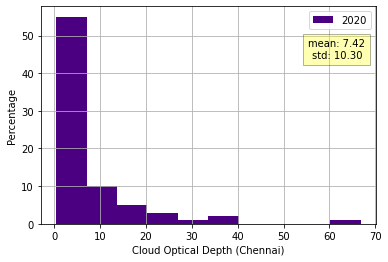

In [114]:
plt.xlabel('Cloud Optical Depth (Chennai)')
plt.ylabel('Percentage')
#chennai['2016'].hist()
#chennai['2017'].hist()
#chennai['2018'].hist()
#chennai['2019'].hist()
chennai['2020'].hist(label= '2020', color = "indigo")
plt.legend(loc='upper right');
plt.figtext(0.81, 0.7, "mean: {:.2f}\nstd: {:.2f}".format(chennai['2020'].mean(), chennai['2020'].std()), ha="center", fontsize=10, bbox={"facecolor":"yellow", "alpha":0.3, "pad":5})

### Scatter Plots:

#### For Water:

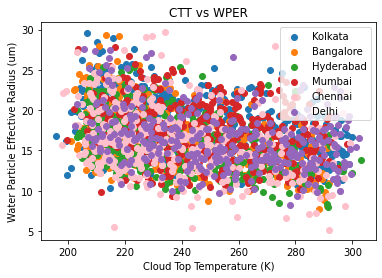

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('CTT vs WPER')
plt.xlabel('Cloud Top Temperature (K)')
plt.ylabel('Water Particle Effective Radius (um)')

ax1.scatter(kolkata_temp["CTT"], kolkata_temp["WCER"], label='Kolkata')
ax1.scatter(bangalore_temp["CTT"],bangalore_temp["WCER"], label='Bangalore')
ax1.scatter(hyderabad_temp["CTT"],hyderabad_temp["WCER"], label='Hyderabad')
ax1.scatter(mumbai_temp["CTT"],mumbai_temp["WCER"], label='Mumbai')
ax1.scatter(chennai_temp["CTT"],chennai_temp["WCER"], c='pink', label='Chennai')
ax1.scatter(delhi_temp["CTT"],delhi_temp["WCER"], label='Delhi')

plt.legend(loc='upper right');
plt.show()

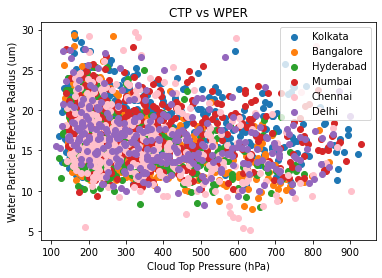

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('CTP vs WPER')
plt.xlabel('Cloud Top Pressure (hPa)')
plt.ylabel('Water Particle Effective Radius (um)')

ax1.scatter(kolkata_temp["CTP"], kolkata_temp["WCER"], label='Kolkata')
ax1.scatter(bangalore_temp["CTP"],bangalore_temp["WCER"], label='Bangalore')
ax1.scatter(hyderabad_temp["CTP"],hyderabad_temp["WCER"], label='Hyderabad')
ax1.scatter(mumbai_temp["CTP"],mumbai_temp["WCER"], label='Mumbai')
ax1.scatter(chennai_temp["CTP"],chennai_temp["WCER"], c='pink', label='Chennai')
ax1.scatter(delhi_temp["CTP"],delhi_temp["WCER"], label='Delhi')

plt.legend(loc='upper right');
plt.show()

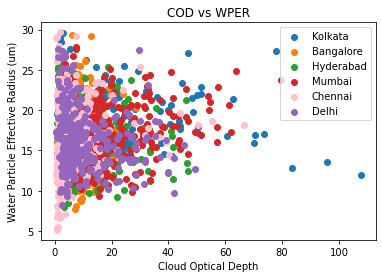

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('COD vs WPER')
plt.xlabel('Cloud Optical Depth')
plt.ylabel('Water Particle Effective Radius (um)')

ax1.scatter(kolkata_temp["COD"], kolkata_temp["WCER"], label='Kolkata')
ax1.scatter(bangalore_temp["COD"],bangalore_temp["WCER"], label='Bangalore')
ax1.scatter(hyderabad_temp["COD"],hyderabad_temp["WCER"], label='Hyderabad')
ax1.scatter(mumbai_temp["COD"],mumbai_temp["WCER"], label='Mumbai')
ax1.scatter(chennai_temp["COD"],chennai_temp["WCER"], c='pink', label='Chennai')
ax1.scatter(delhi_temp["COD"],delhi_temp["WCER"], label='Delhi')

plt.legend(loc='upper right');
plt.show()

#### For Ice

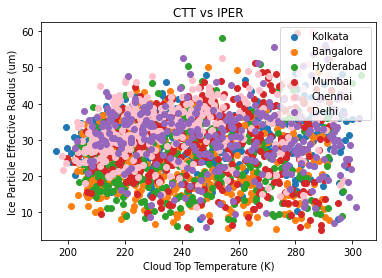

In [56]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('CTT vs IPER')
plt.xlabel('Cloud Top Temperature (K)')
plt.ylabel('Ice Particle Effective Radius (um)')

ax1.scatter(kolkata_temp["CTT"], kolkata_temp["CER"], label='Kolkata')
ax1.scatter(bangalore_temp["CTT"],bangalore_temp["CER"], label='Bangalore')
ax1.scatter(hyderabad_temp["CTT"],hyderabad_temp["CER"], label='Hyderabad')
ax1.scatter(mumbai_temp["CTT"],mumbai_temp["CER"], label='Mumbai')
ax1.scatter(chennai_temp["CTT"],chennai_temp["CER"], c='pink', label='Chennai')
ax1.scatter(delhi_temp["CTT"],delhi_temp["CER"], label='Delhi')

plt.legend(loc='upper right');
plt.show()

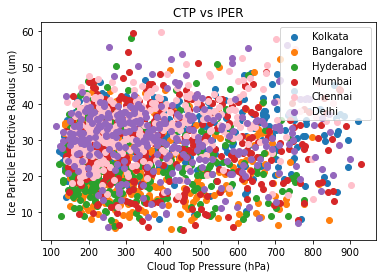

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('CTP vs IPER')
plt.xlabel('Cloud Top Pressure (hPa)')
plt.ylabel('Ice Particle Effective Radius (um)')

ax1.scatter(kolkata_temp["CTP"], kolkata_temp["CER"], label='Kolkata')
ax1.scatter(bangalore_temp["CTP"],bangalore_temp["CER"], label='Bangalore')
ax1.scatter(hyderabad_temp["CTP"],hyderabad_temp["CER"], label='Hyderabad')
ax1.scatter(mumbai_temp["CTP"],mumbai_temp["CER"], label='Mumbai')
ax1.scatter(chennai_temp["CTP"],chennai_temp["CER"], c='pink', label='Chennai')
ax1.scatter(delhi_temp["CTP"],delhi_temp["CER"], label='Delhi')

plt.legend(loc='upper right');
plt.show()

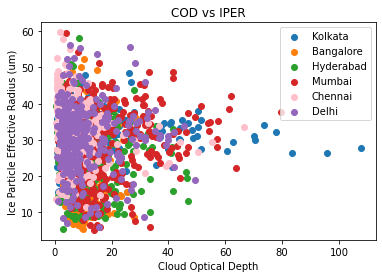

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('COD vs IPER')
plt.xlabel('Cloud Optical Depth')
plt.ylabel('Ice Particle Effective Radius (um)')

ax1.scatter(kolkata_temp["COD"], kolkata_temp["CER"], label='Kolkata')
ax1.scatter(bangalore_temp["COD"],bangalore_temp["CER"], label='Bangalore')
ax1.scatter(hyderabad_temp["COD"],hyderabad_temp["CER"], label='Hyderabad')
ax1.scatter(mumbai_temp["COD"],mumbai_temp["CER"], label='Mumbai')
ax1.scatter(chennai_temp["COD"],chennai_temp["CER"], c='pink', label='Chennai')
ax1.scatter(delhi_temp["COD"],delhi_temp["CER"], label='Delhi')

plt.legend(loc='upper right');
plt.show()

## Making Datasets for the Prediction Model: 

#### For CER:

In [12]:
x_train_CER = train[['CTT', 'CTP', 'COD']]
y_train_CER = train['CER']
x_test_CER = test[['CTT', 'CTP', 'COD']]
y_test_CER = test['CER']

#### For WCER:

In [13]:
x_train_WCER = train[['CTT', 'CTP', 'COD']]
y_train_WCER = train['WCER']
x_test_WCER = test[['CTT', 'CTP', 'COD']]
y_test_WCER = test['WCER']

## Gradient Descent:

In [14]:
def gd(x1, x2, x3, y):
    m1 = m2 = m3 = b = 0
    iteration = 10000
    n = len(y)
    lr = 0.0000047
    for i in range(iteration):
        y_pre = m1*x1 + m2*x2 + m3*x3 + b
        cost = (1/n)*sum([val**2 for val in (y-y_pre)])
        m1d = -(2/n)*sum(x1*(y-y_pre))
        m2d = -(2/n)*sum(x2*(y-y_pre))
        m3d = -(2/n)*sum(x3*(y-y_pre))
        bd = -(2/n)*sum((y-y_pre))
        
        m1 = m1 - lr*m1d
        m2 = m2 - lr*m2d
        m3 = m3 - lr*m3d
        b = b - lr*bd
        
    return [m1, m2, m3, b, cost]

model = gd(x_train_WCER['CTT'], x_train_WCER['CTP'], x_train_WCER['COD'], y_train_WCER)


#a = {
#    '1': [1, 2, 3, 4, 5],
#    '2': [2, 4, 6, 8, 10]
#}
#a = pd.DataFrame(a)

#gd(a['1'], a['2'])

model

[0.08763528698364664,
 -0.013543220481943227,
 0.026571230454651446,
 0.016564501371274083,
 17.467793272938415]

In [15]:
def predict(model, x1, x2, x3):
    m1 = model[0]
    m2 = model[1]
    m3 = model[2]
    b = model[3]
    out = []
    y = m1*x1 + m2*x2 + m3*x3 + b
    out.append(y)
    return y

out = predict(model, x_test_WCER['CTT'], x_test_WCER['CTP'], x_test_WCER['COD'])
out[0]

20.314591392965895

In [46]:
result_WCER = []
for i in y_test_WCER.keys():
    result_WCER.append(y_test_WCER[i])
pre = pd.DataFrame({'Predicted Value': out, 'Expected Value': result_WCER})
pre

,Predicted Value,Expected Value
0,20.314591,14.81
1,16.937208,15.22
2,16.846559,17.55
4,21.378796,17.32
5,15.391165,14.02
...,...,...
724,15.325453,12.26
726,17.393102,13.56
728,17.252788,15.10
729,18.341464,17.03


In [47]:
pre['coef'] = pre['Predicted Value']/pre['Expected Value']
pre

,Predicted Value,Expected Value,coef
0,20.314591,14.81,1.371681
1,16.937208,15.22,1.112826
2,16.846559,17.55,0.959918
4,21.378796,17.32,1.234342
5,15.391165,14.02,1.097801
...,...,...,...
724,15.325453,12.26,1.250037
726,17.393102,13.56,1.282677
728,17.252788,15.10,1.142569
729,18.341464,17.03,1.077009


In [48]:
pre = pre[(pre['coef']>=0.8) & (pre['coef']<=1.2)]
pre

,Predicted Value,Expected Value,coef
1,16.937208,15.22,1.112826
2,16.846559,17.55,0.959918
5,15.391165,14.02,1.097801
6,18.241195,18.66,0.977556
8,14.851690,15.37,0.966278
...,...,...,...
721,18.971800,19.66,0.964995
722,17.591149,19.21,0.915729
728,17.252788,15.10,1.142569
729,18.341464,17.03,1.077009


In [49]:
pre.corr()

,Predicted Value,Expected Value,coef
Predicted Value,1.000000,0.488855,0.218686
Expected Value,0.488855,1.000000,-0.738574
coef,0.218686,-0.738574,1.000000


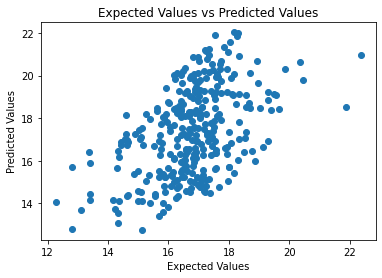

In [50]:
plt.title('Expected Values vs Predicted Values')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.scatter(pre['Predicted Value'], pre['Expected Value'])

In [57]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(pre['Expected Value'], pre['Predicted Value']))
print("Root mean squared error regression loss =", rmse)

Root mean squared error regression loss = 1.931510068240619


In [51]:
rain_pre = []
for i in pre['Predicted Value'].keys():
    if pre['Predicted Value'][i]>20:
        rain_pre.append(True)
    else:
        rain_pre.append(False)

In [52]:
rain_ex = []
for i in pre['Expected Value'].keys():
    if pre['Expected Value'][i]>20:
        rain_ex.append(True)
    else:
        rain_ex.append(False)

In [53]:
rain = pd.DataFrame({'predicted': rain_pre, 'expected': rain_ex})
rain

,predicted,expected
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
304,False,False
305,False,False
306,False,False
307,False,False


In [54]:
i = 0
l = len(rain_ex)
count = 0
while(i<l):
    if rain_pre[i] == rain_ex[i]:
        count+=1
    i+=1
count

271

In [55]:
accuracy = count*100/l
print("prediction accuracy =", accuracy)

prediction accuracy = 87.70226537216828


## Creating Prediction Model:

#### For CER:

In [17]:
from sklearn import linear_model
model_CER = linear_model.LinearRegression()
model_CER.fit(x_train_CER, y_train_CER)

LinearRegression()

In [18]:
coeff_df_CER = pd.DataFrame(model_CER.coef_, x_train_CER.columns, columns=['Coefficient'])
coeff_df_CER

,Coefficient
CTT,0.015240
CTP,0.001438
COD,-0.000820


#### For WCER:

In [19]:
model_WCER = linear_model.LinearRegression()
model_WCER.fit(x_train_WCER, y_train_WCER)

LinearRegression()

In [20]:
coeff_df_WCER = pd.DataFrame(model_WCER.coef_, x_train_WCER.columns, columns=['Coefficient'])
coeff_df_WCER

,Coefficient
CTT,-0.047698
CTP,-0.000402
COD,-0.002705


## Predicting Values:

#### For CER:

In [21]:
predicted_CER = model_CER.predict(x_test_CER)
result_CER = []
for i in y_test_CER.keys():
    result_CER.append(y_test_CER[i])
x_CER = pd.DataFrame({'Predicted Value': predicted_CER, 'Expected Value': result_CER})
x_CER

,Predicted Value,Expected Value
0,29.244730,41.259999
1,28.487491,35.189999
2,29.479182,38.089999
3,28.919216,51.149999
4,29.204303,40.549999
...,...,...
494,29.207998,27.309999
495,29.600815,15.540000
496,27.651937,20.840000
497,28.447994,24.239999


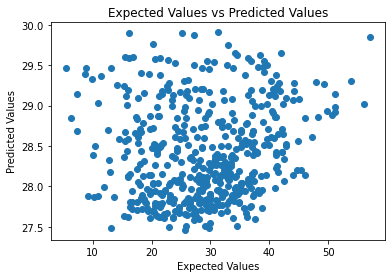

In [22]:
plt.title('Expected Values vs Predicted Values')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test_CER, predicted_CER)

In [23]:
from sklearn import metrics
rmse_CER = np.sqrt(metrics.mean_squared_error(y_test_CER, predicted_CER))
print("Root mean squared error regression loss =", rmse_CER)
mape_CER = metrics.mean_absolute_percentage_error(y_test_CER, predicted_CER)
print("Mean absolute percentage error regression loss =", mape_CER)

Root mean squared error regression loss = 8.949908139566915
Mean absolute percentage error regression loss = 0.3170224580364329


#### For WCER:

In [24]:
predicted_WCER = model_WCER.predict(x_test_WCER)
result_WCER = []
for i in y_test_WCER.keys():
    result_WCER.append(y_test_WCER[i])
x_WCER = pd.DataFrame({'Predicted Value': predicted_WCER, 'Expected Value': result_WCER})
x_WCER

,Predicted Value,Expected Value
0,14.457188,14.81
1,16.624882,15.22
2,14.617116,17.55
3,14.904691,17.32
4,15.445385,14.02
...,...,...
494,15.455787,12.26
495,14.269838,13.56
496,18.296624,15.10
497,16.449075,17.03


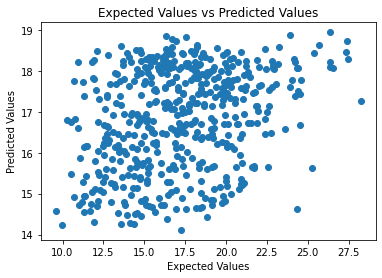

In [25]:
plt.title('Expected Values vs Predicted Values')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test_WCER, predicted_WCER)

In [26]:
rmse_WCER = np.sqrt(metrics.mean_squared_error(y_test_WCER, predicted_WCER))
print("Root mean squared error regression loss =", rmse_WCER)
mape_WCER = metrics.mean_absolute_percentage_error(y_test_WCER, predicted_WCER)
print("Mean absolute percentage error regression loss =", mape_WCER)

Root mean squared error regression loss = 3.407176277940858
Mean absolute percentage error regression loss = 0.16518084186447773


In [27]:
x_WCER.corr()

,Predicted Value,Expected Value
Predicted Value,1.00000,0.30588
Expected Value,0.30588,1.00000


## Rainfall Prediction:

In [28]:
rain_pre = []
for i in predicted_WCER:
    if i+rmse_WCER>20:
        rain_pre.append(1)
    else:
        rain_pre.append(0)

In [29]:
rain_ex = []
for i in y_test_WCER.keys():
    if y_test_WCER[i]>20:
        rain_ex.append(1)
    else:
        rain_ex.append(0)

In [30]:
rain = pd.DataFrame({'predicted': rain_pre, 'expected': rain_ex})
rain

,predicted,expected
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
494,0,0
495,0,0
496,1,0
497,0,0


In [31]:
i = 0
l = len(rain_ex)
count = 0
while(i<l):
    if rain_pre[i] == rain_ex[i]:
        count+=1
    i+=1
count

255

In [32]:
accuracy = count*100/l
print("prediction accuracy =", accuracy)

prediction accuracy = 51.102204408817634
